# Overlap of TriPepSVM cross-species predictions
We wanted to investigate if TriPepSVM learns the same rules for different organisms.
In this notebook, we want to see if the predictions for the same proteome overlap,
if we train the algorithm on data from different organisms.

We run our analysis for three different organisms, namely:
* *Human*
* *E. Coli*
* *Salmonella*

**The folder contains a script to train TriPepSVM on three organisms and save the proteome-wide predictions.
This notebook computes the Venn-diagrams according to the tuned optimal cutoffs for each organism (see figure 2 for details)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Times New Roman')
import seaborn as sns
import matplotlib_venn

%matplotlib inline

/home/sasse/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Thresholds

In [2]:
HUMAN_CUTOFF = 0.68
ECOLI_CUTOFF = 0.26
SALMONELLA_CUTOFF = 0.28

## Human Proteome

In [3]:
human_trained = pd.read_csv('../data/proteome_prediction_human/proteome_9606.TriPepSVM.pred.txt', sep='\t', header=None, names=['Name', 'Score', 'Class'], index_col=0)
ecoli_trained = pd.read_csv('../data/cross_species/561_on_9606_proteome/proteome_9606.TriPepSVM.pred.txt', sep='\t', header=None, names=['Name', 'Score', 'Class'], index_col=0)
salmonella_trained = pd.read_csv('../data/cross_species/590_on_9606_proteome/proteome_9606.TriPepSVM.pred.txt', sep='\t', header=None, names=['Name', 'Score', 'Class'], index_col=0)

assert ((human_trained.index == ecoli_trained.index).all())
assert ((ecoli_trained.index == salmonella_trained.index).all())

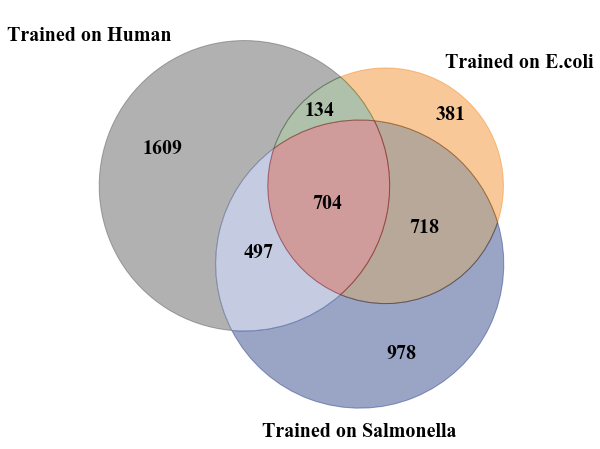

In [4]:
fig = plt.figure(figsize=(14, 8))
v = matplotlib_venn.venn3([set(human_trained[human_trained.Score > HUMAN_CUTOFF].index), set(ecoli_trained[ecoli_trained.Score > ECOLI_CUTOFF].index), set(salmonella_trained[salmonella_trained.Score > SALMONELLA_CUTOFF].index)],
          set_labels=['Trained on Human', 'Trained on E.coli', 'Trained on Salmonella'])
v.get_patch_by_id('10').set_color('#3d3e3d')
v.get_patch_by_id('11').set_color('#37652d')
v.get_patch_by_id('01').set_color('#ee7600')
v.get_patch_by_id('111').set_color('#890707')
v.get_patch_by_id('101').set_color('#6E80B7')
v.get_patch_by_id('011').set_color('#4d2600')
v.get_patch_by_id('001').set_color('#031F6F')
v.get_label_by_id('A').set_fontsize(20)
v.get_label_by_id('B').set_fontsize(20)
v.get_label_by_id('C').set_fontsize(20)
v.get_label_by_id('10').set_fontsize(20)
v.get_label_by_id('11').set_fontsize(20)
v.get_label_by_id('01').set_fontsize(20)
v.get_label_by_id('111').set_fontsize(20)
v.get_label_by_id('101').set_fontsize(20)
v.get_label_by_id('011').set_fontsize(20)
v.get_label_by_id('001').set_fontsize(20)
fig.savefig('human_proteome_overlap.svg')

## Salmonella Proteome

In [5]:
human_trained = pd.read_csv('../data/cross_species/9606_on_590_proteome/proteome_99287.TriPepSVM.pred.txt', sep='\t', header=None, names=['Name', 'Score', 'Class'], index_col=0)
ecoli_trained = pd.read_csv('../data/cross_species/561_on_590_proteome/proteome_99287.TriPepSVM.pred.txt', sep='\t', header=None, names=['Name', 'Score', 'Class'], index_col=0)
salmonella_trained = pd.read_csv('../data/proteome_prediction_salmonella/proteome_99287.TriPepSVM.pred.txt', sep='\t', header=None, names=['Name', 'Score', 'Class'], index_col=0)

assert ((human_trained.index == ecoli_trained.index).all())
assert ((ecoli_trained.index == salmonella_trained.index).all())

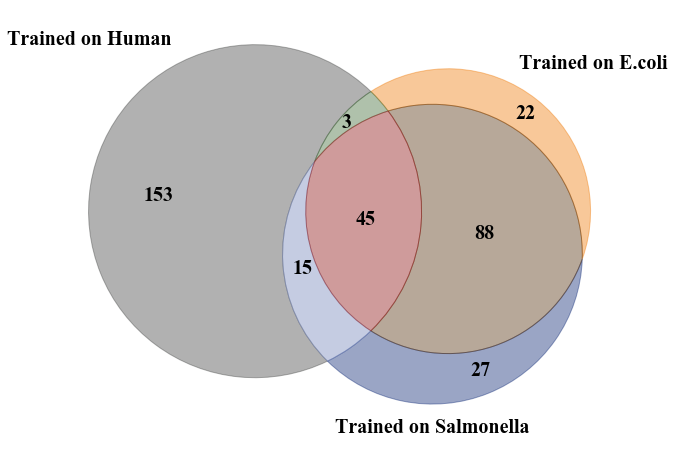

In [6]:
fig = plt.figure(figsize=(14, 8))
v = matplotlib_venn.venn3([set(human_trained[human_trained.Score > HUMAN_CUTOFF].index), set(ecoli_trained[ecoli_trained.Score > ECOLI_CUTOFF].index), set(salmonella_trained[salmonella_trained.Score > SALMONELLA_CUTOFF].index)],
          set_labels=['Trained on Human', 'Trained on E.coli', 'Trained on Salmonella'])
v.get_patch_by_id('10').set_color('#3d3e3d')
v.get_patch_by_id('11').set_color('#37652d')
v.get_patch_by_id('01').set_color('#ee7600')
v.get_patch_by_id('111').set_color('#890707')
v.get_patch_by_id('101').set_color('#6E80B7')
v.get_patch_by_id('011').set_color('#4d2600')
v.get_patch_by_id('001').set_color('#031F6F')
v.get_label_by_id('A').set_fontsize(20)
v.get_label_by_id('B').set_fontsize(20)
v.get_label_by_id('C').set_fontsize(20)
v.get_label_by_id('10').set_fontsize(20)
v.get_label_by_id('11').set_fontsize(20)
v.get_label_by_id('01').set_fontsize(20)
v.get_label_by_id('111').set_fontsize(20)
v.get_label_by_id('101').set_fontsize(20)
v.get_label_by_id('011').set_fontsize(20)
v.get_label_by_id('001').set_fontsize(20)
fig.savefig('salmonella_proteome_overlap.svg')

## E.Coli Proteome (somehow the proteome is huge. It should be smaller)

In [8]:
human_trained = pd.read_csv('../data/cross_species/9606_on_561_proteome/proteome_83333.TriPepSVM.pred.txt', sep='\t', header=None, names=['Name', 'Score', 'Class'], index_col=0)
ecoli_trained = pd.read_csv('../data/proteome_prediction_ecoli/proteome_83333.TriPepSVM.pred.txt', sep='\t', header=None, names=['Name', 'Score', 'Class'], index_col=0)
salmonella_trained = pd.read_csv('../data/cross_species/590_on_561_proteome/proteome_83333.TriPepSVM.pred.txt', sep='\t', header=None, names=['Name', 'Score', 'Class'], index_col=0)

assert ((human_trained.index == ecoli_trained.index).all())
assert ((ecoli_trained.index == salmonella_trained.index).all())

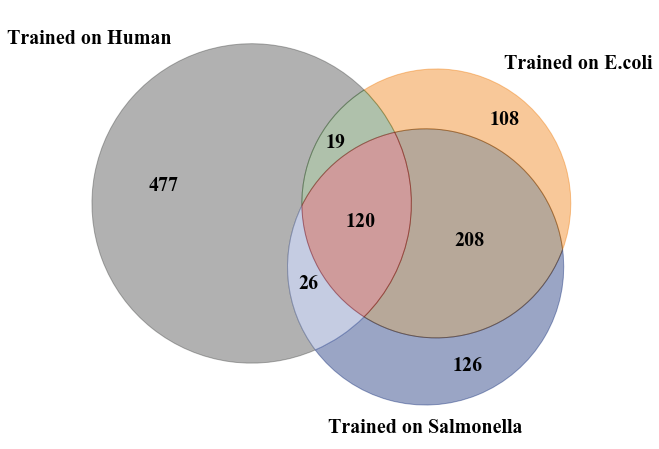

In [9]:
fig = plt.figure(figsize=(14, 8))
v = matplotlib_venn.venn3([set(human_trained[human_trained.Score > HUMAN_CUTOFF].index), set(ecoli_trained[ecoli_trained.Score > ECOLI_CUTOFF].index), set(salmonella_trained[salmonella_trained.Score > SALMONELLA_CUTOFF].index)],
          set_labels=['Trained on Human', 'Trained on E.coli', 'Trained on Salmonella'])
v.get_patch_by_id('10').set_color('#3d3e3d')
v.get_patch_by_id('11').set_color('#37652d')
v.get_patch_by_id('01').set_color('#ee7600')
v.get_patch_by_id('111').set_color('#890707')
v.get_patch_by_id('101').set_color('#6E80B7')
v.get_patch_by_id('011').set_color('#4d2600')
v.get_patch_by_id('001').set_color('#031F6F')
v.get_label_by_id('A').set_fontsize(20)
v.get_label_by_id('B').set_fontsize(20)
v.get_label_by_id('C').set_fontsize(20)
v.get_label_by_id('10').set_fontsize(20)
v.get_label_by_id('11').set_fontsize(20)
v.get_label_by_id('01').set_fontsize(20)
v.get_label_by_id('111').set_fontsize(20)
v.get_label_by_id('101').set_fontsize(20)
v.get_label_by_id('011').set_fontsize(20)
v.get_label_by_id('001').set_fontsize(20)
fig.savefig('ecoli_proteome_overlap.svg')